# K-Means Clustering Algorithm
## Author : Ashish Kumar Patra
## 1. Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Dataset and Check Details

In [2]:
df = pd.read_csv("C:\\Users\\ASHISH\\Desktop\\DataSets\\winequality-red.csv")
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### i. Count the value of Quality

In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### ii. Pair Plot

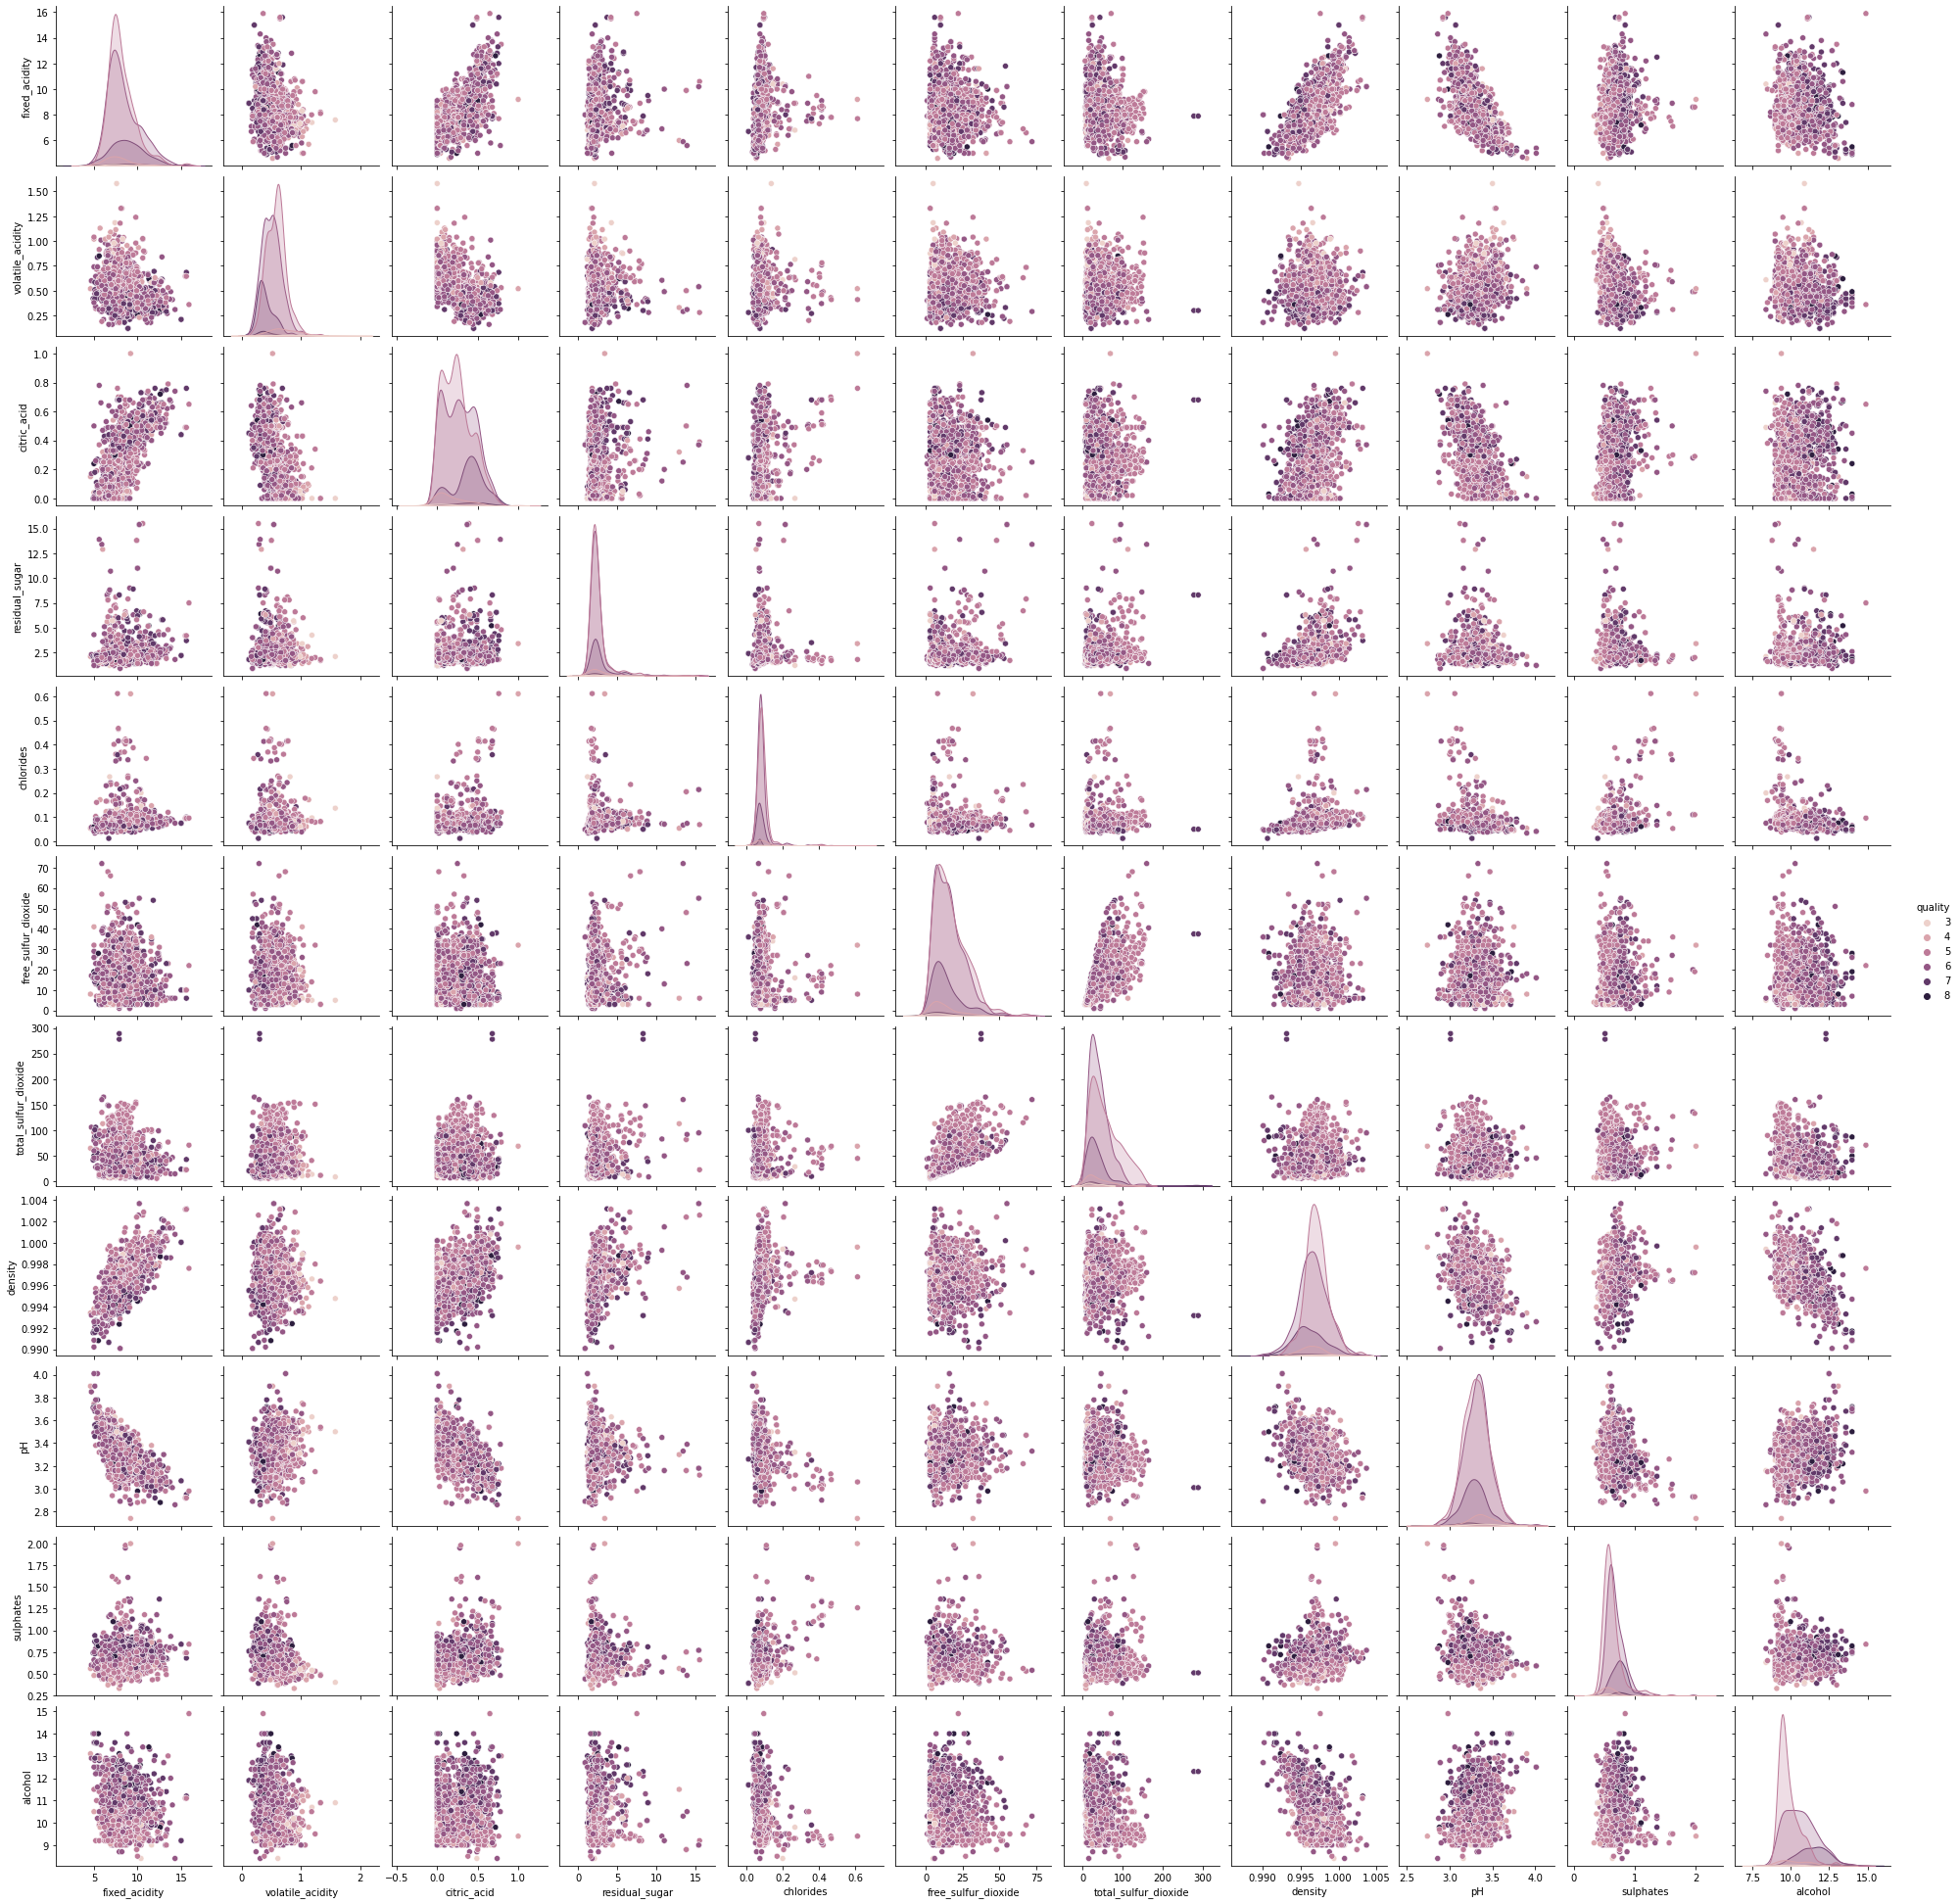

In [5]:
sns.pairplot(df,diag_kind='kde',hue='quality')

In [6]:
# Dropping the Quality Feature from the Dataset and Perform PairPlot.

df2 = df.drop('quality',axis=1)
df2.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

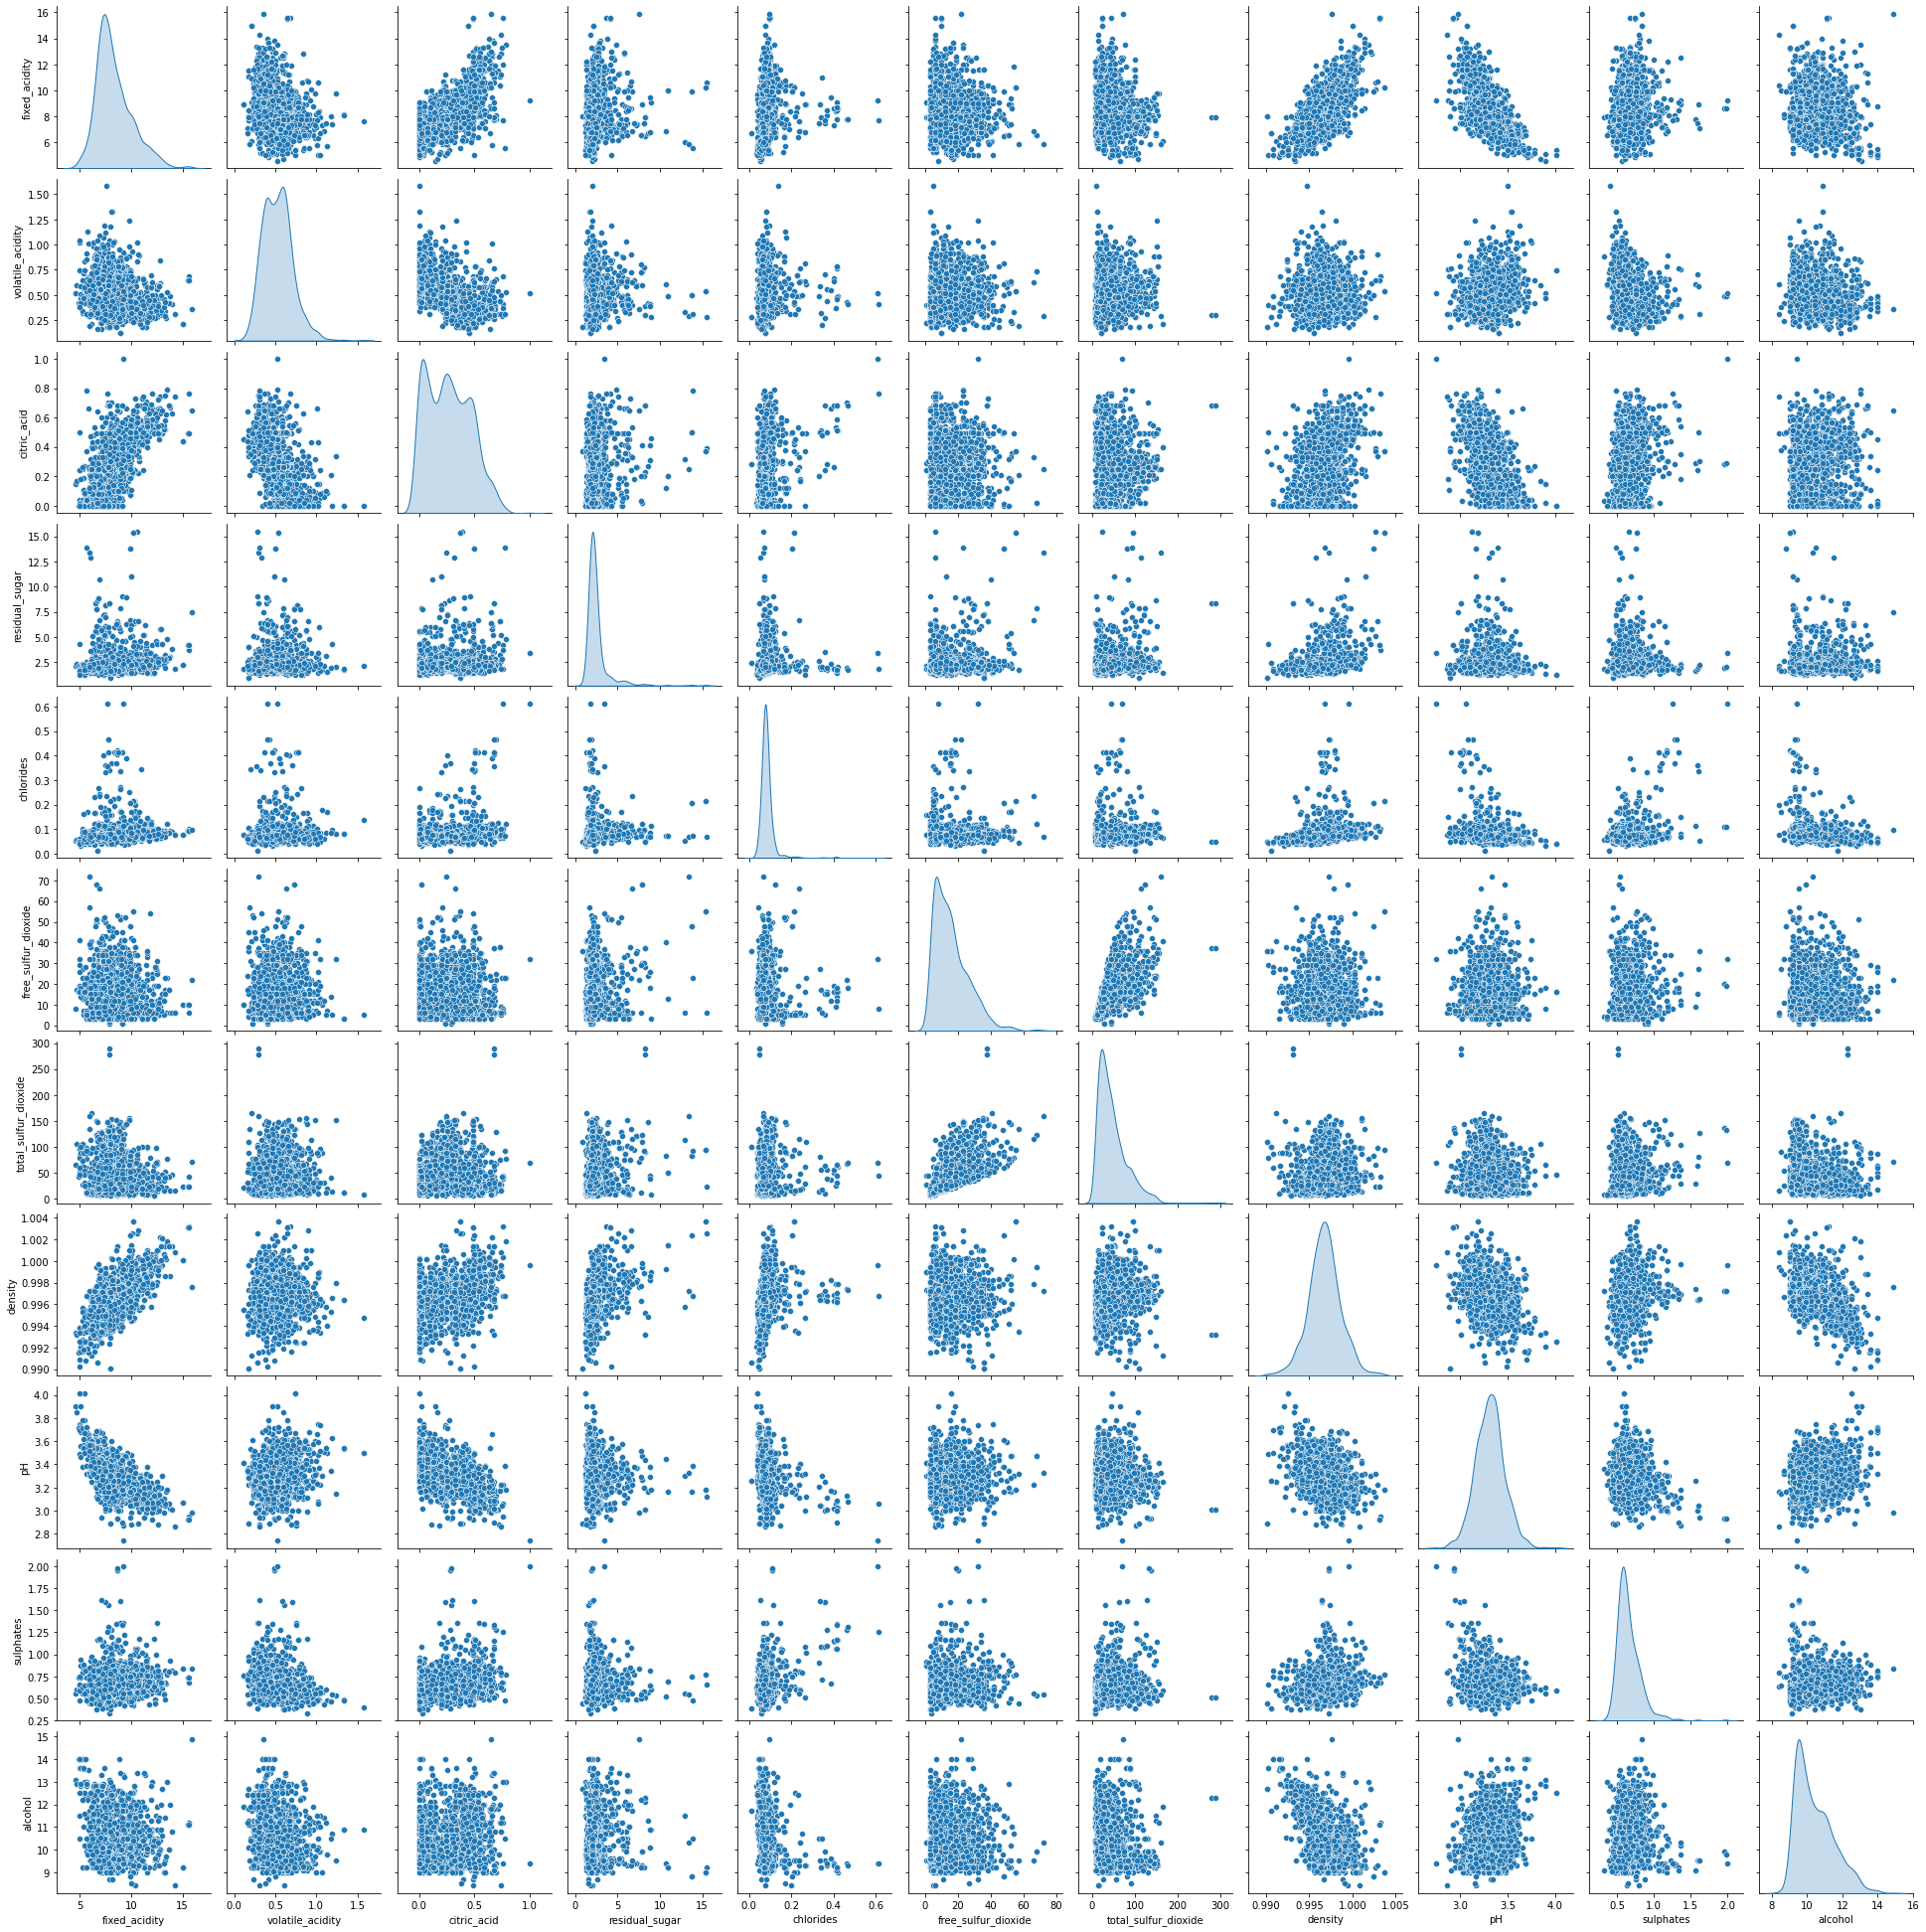

In [7]:
sns.pairplot(df2,diag_kind='kde')

### iii. Scale the Dataset (Apply z-score)

In [9]:
from scipy.stats import zscore
df_scaled = df2.apply(zscore)
df_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

## 3. K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
k_2 = KMeans(n_clusters=2)
k_2.fit(df_scaled)

KMeans(n_clusters=2)

In [11]:
k_2.inertia_

14330.940238810914

### Check for Optimal Number of Clusters
### i. Find suitable no of Clusters for K-Means

In [13]:
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init = 15, random_state=2)
    clusters.fit(df_scaled)
    cluster_errors.append( clusters.inertia_ )

### ii. Capture the Cluster Labels

In [15]:
labels = clusters.labels_

### iii. Capture the Centroids

In [16]:
centroids = clusters.cluster_centers_

### iv. Combine the cluster_range and cluster_errors into a DataFrame

In [17]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    17589.000000
1              2    14330.142460
2              3    12629.950272
3              4    11295.828163
4              5    10155.509585
5              6     9364.843259
6              7     8644.639865
7              8     8305.525744
8              9     7966.662835
9             10     7668.879157
10            11     7445.402188
11            12     7252.136512
12            13     7013.731066
13            14     6806.037134

The total sum of Squared Distances of every Data Point from Respective Centroid is also called Inertia. Let us Print the Inertia value for all K values. That K at which the Inertia stops to drop significantly (elbow method) will be the best K.

### v. Perform the Elbow Plot

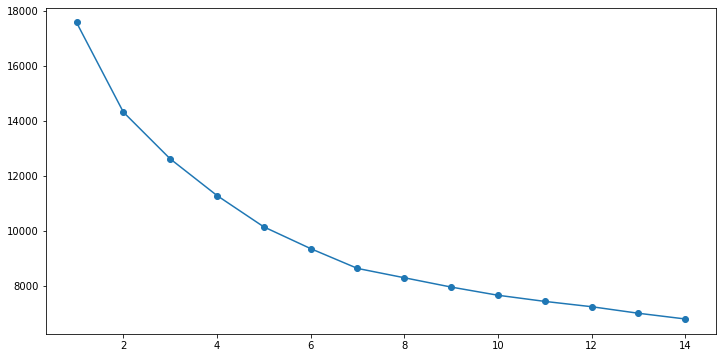

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

## 4. Take Appropriate Cluster and Build a K-Means Cluster
### i. Set the Number of Clusters

In [19]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

### ii. Fit the Input Data

In [21]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2, n_init=15, random_state=2)

### iii. Perform the Centroids

In [23]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.537736          0.368693    -0.573725       -0.095076  -0.155265   
1       0.924577         -0.633927     0.986456        0.163472   0.266961   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.137293              0.125006 -0.291750  0.415126  -0.310116   
1            -0.236061             -0.214935  0.501632 -0.713763   0.533210   

    alcohol  
0 -0.099208  
1  0.170578